In [3]:
import pandas as pd
import os
import numpy as np


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rc("font",family="Arial")

In [4]:
dftopo = pd.read_csv("all_subtype_all_region_r_values.csv",index_col=0)

In [5]:
for soma in ["soma_AP"]:
    for ter in ["ter_AP"]:
        dftmp = dftopo.loc[(dftopo.soma_label==soma)&(dftopo.ter_label==ter)]
        dfr_value = dftmp.pivot(index="subtype",columns="area",values="r_value").fillna(0)
        dfp_value = dftmp.pivot(index="subtype",columns="area",values="p_value").fillna(1)
        dfr_value.to_excel("%s_%s_r_values.xlsx"%(soma,ter))
        dfp_value.to_excel("%s_%s_p_values.xlsx"%(soma,ter))


        sorted_values = np.sort(dfp_value.values.flatten())
        sorted_values_new = sorted_values[sorted_values < 0.05]

        subtype_list = []
        area_list = []
        for i in sorted_values_new:
            position = dfp_value.isin([i])
            rows, cols = np.where(position)

            subtype = dfp_value.index[rows][0]
            area = dfp_value.columns[cols][0]

            if subtype not in subtype_list:
                subtype_list.append(subtype)
            if area not in area_list:
                area_list.append(area)

        dfp_value_new = dfp_value.loc[subtype_list,area_list]
        dfr_value_new = dfr_value.loc[subtype_list,area_list]
        
        fig, ax = plt.subplots(figsize = (18.5,9))
        sns.set(font_scale=1)
        sns.heatmap(data = dfr_value_new,cmap="bwr",vmin=-1,
                        vmax=1,linewidths=1, linecolor='black',annot=False,fmt="g",
                        mask = dfp_value_new>0.05
                        )
        # plt.savefig("heatmap_for_intra_three_gene.jpg",dpi =300)
        plt.savefig("%s_%s_for_All.pdf"%(soma,ter),dpi =600,format="pdf")
        plt.savefig("%s_%s_for_All.jpg"%(soma,ter),dpi =600,format="jpg")
        plt.close()
        


In [59]:
sorted_values_new

array([4.72214052e-08, 3.59159156e-07, 4.66614275e-07, 4.69769032e-07,
       3.53651648e-06, 6.34005784e-06, 7.38833604e-06, 1.03678086e-05,
       1.42067741e-05, 1.69744341e-05, 3.18847344e-05, 3.47243062e-05,
       7.65644088e-05, 1.38079068e-04, 1.77533802e-04, 2.38381769e-04,
       2.82054722e-04, 5.33603294e-04, 7.40366236e-04, 1.11002389e-03,
       1.13481752e-03, 1.37222056e-03, 1.42111007e-03, 1.46349071e-03,
       1.54627366e-03, 2.01214571e-03, 2.83110129e-03, 3.19762817e-03,
       3.52659691e-03, 3.56086104e-03, 5.04473611e-03, 6.72240499e-03,
       6.99008832e-03, 7.44990171e-03, 7.49909762e-03, 7.60836222e-03,
       7.77982707e-03, 7.80936904e-03, 8.17166325e-03, 8.19251706e-03,
       8.31869659e-03, 9.02220664e-03, 9.77914594e-03, 1.05499781e-02,
       1.10108754e-02, 1.10464319e-02, 1.12307745e-02, 1.14924140e-02,
       1.19035558e-02, 1.19663501e-02, 1.19749489e-02, 1.31146078e-02,
       1.43685880e-02, 1.51549379e-02, 1.60760979e-02, 1.64286945e-02,
      

In [60]:
subtype_list = []
area_list = []
for i in sorted_values_new:
    position = dfp_value.isin([i])
    rows, cols = np.where(position)

    subtype = dfp_value.index[rows][0]
    area = dfp_value.columns[cols][0]

    if subtype not in subtype_list:
        subtype_list.append(subtype)
    if area not in area_list:
        area_list.append(area)

In [63]:
dfp_value_new = dfp_value.loc[subtype_list,area_list]
dfr_value_new = dfr_value.loc[subtype_list,area_list]

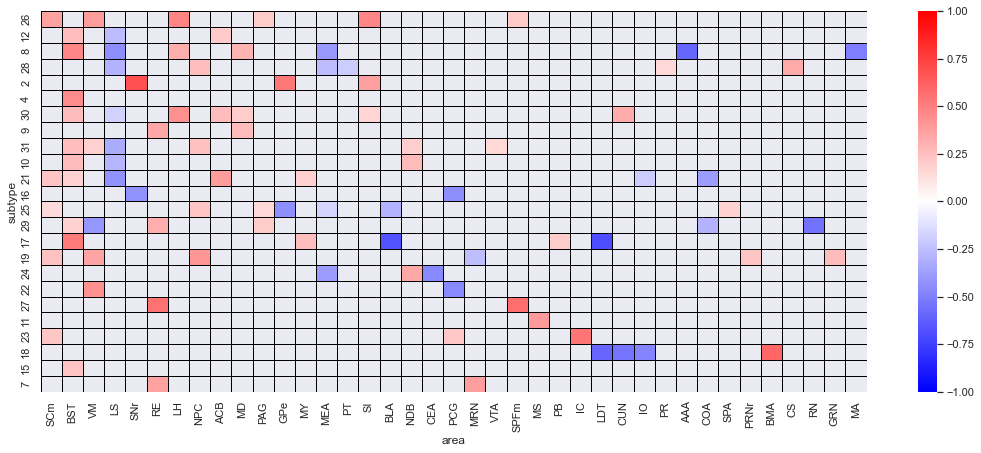

In [68]:
fig, ax = plt.subplots(figsize = (18.5,7))
sns.set(font_scale=1)
sns.heatmap(data = dfr_value_new,cmap="bwr",vmin=-1,
                 vmax=1,linewidths=1, linecolor='black',annot=False,fmt="g",
                  mask = dfp_value_new>0.05
                 )
# plt.savefig("heatmap_for_intra_three_gene.jpg",dpi =300)
plt.savefig("heatmap_for_region1.pdf",dpi =600,format="pdf")
plt.savefig("heatmap_for_region1.jpg",dpi =600,format="jpg")

In [37]:
position = dfp_value.isin([dfp_value.min().min()])
rows, cols = np.where(position)


In [39]:
dfp_value.columns[cols][0]

'SCm'

In [ ]:
subtype_list = []
for i in dfregion_plot.columns.tolist():
    area =dfregion_plot.loc[dfregion_plot[i]>0].index.tolist()
    subtype_list.extend([item for item in area if item not in subtype_list])
subtype_list.extend([item for item in dfregion_plot.index.tolist() if item not in subtype_list])
dfregion_plot2 =dfregion_plot.loc[subtype_list,:]
dfregion_pvalue2 =dfregion_pvalue.loc[subtype_list,:]

In [11]:

dfregion = pd.read_csv("markersRegion_perSubtype_7180.csv",index_col=0)

In [12]:
dfregion_plot = dfregion.pivot_table(columns="cluster",index="Region",values="avg_log2FC",aggfunc="mean").fillna(0)
dfregion_pvalue = dfregion.pivot_table(columns="cluster",index="Region",values="p_val_adj",aggfunc="mean").fillna(1)

In [13]:
area_list = []
for i in dfregion_plot.columns.tolist():
    area =dfregion_plot.loc[dfregion_plot[i]>0].index.tolist()
    area_list.extend([item for item in area if item not in area_list])
area_list.extend([item for item in dfregion_plot.index.tolist() if item not in area_list])
dfregion_plot2 =dfregion_plot.loc[area_list,:]
dfregion_pvalue2 =dfregion_pvalue.loc[area_list,:]

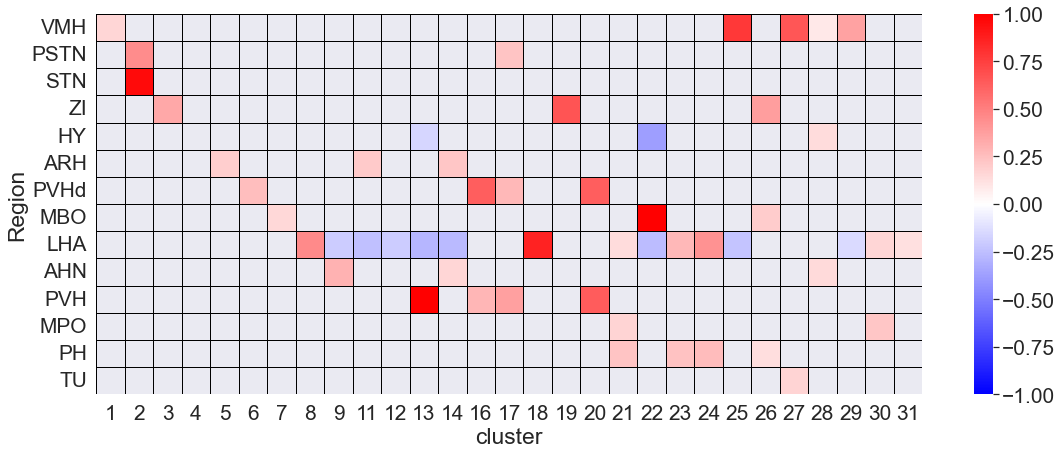

In [14]:
fig, ax = plt.subplots(figsize = (18.5,7))
sns.set(font_scale=1.9)
sns.heatmap(data = dfregion_plot2,cmap="bwr",vmin=-1,
                 vmax=1,linewidths=1, linecolor='black',annot=False,fmt="g",
                  mask = dfregion_pvalue2>0.05
                 )
# plt.savefig("heatmap_for_intra_three_gene.jpg",dpi =300)
plt.savefig("heatmap_for_region1.pdf",dpi =600,format="pdf")
plt.savefig("heatmap_for_region1.jpg",dpi =600,format="jpg")

In [15]:
# for geno distribution
dfgeno = pd.read_csv("markersGeno_perSubtype_7180.csv",index_col=0)

In [16]:
dfgeno.gene = dfgeno.gene.str.capitalize()
dfgeno_plot = dfgeno.pivot_table(columns="cluster",index="gene",values="avg_log2FC",aggfunc="mean").fillna(0)
dfgeno_pvalue = dfgeno.pivot_table(columns="cluster",index="gene",values="p_val_adj",aggfunc="mean").fillna(1)

In [17]:
indexnew = ['Agrp','Wt(orexin)','Oxt','Pomc','Adcyap1','Nts','Pdyn','Penk','Sst','Tac1','Tac2','Trh']

In [18]:
dfgeno_plot = dfgeno_plot.loc[indexnew,:]
dfgeno_pvalue = dfgeno_pvalue.loc[indexnew,:]

In [19]:
geno_list = []
for i in dfgeno_plot.columns.tolist():
    geno =dfgeno_plot.loc[dfgeno_plot[i]>0].index.tolist()
    geno_list.extend([item for item in geno if item not in geno_list])
geno_list.extend([item for item in dfgeno_plot.index.tolist() if item not in geno_list])
dfgeno_plot2 =dfgeno_plot.loc[geno_list,:]
dfgeno_pvalue2 =dfgeno_pvalue.loc[geno_list,:]

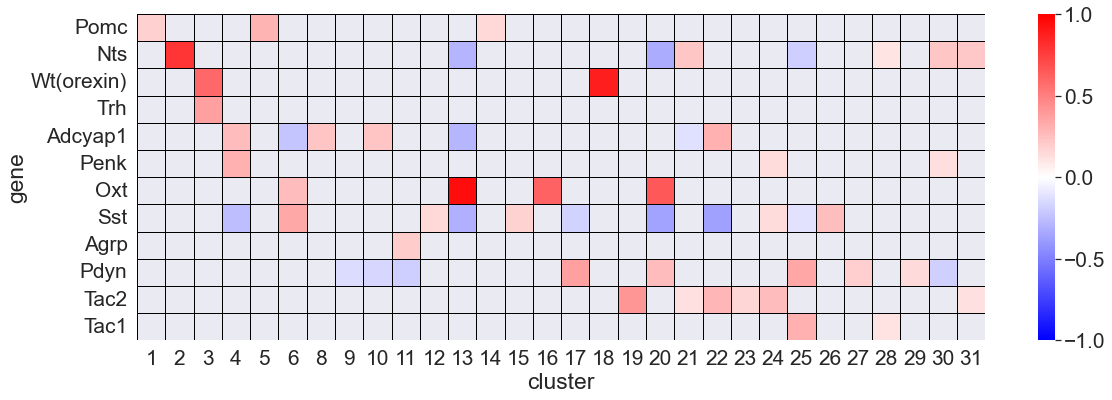

In [20]:
fig, ax = plt.subplots(figsize = (19,6))
sns.set(font_scale=1.9)
sns.heatmap(data = dfgeno_plot2,cmap="bwr",vmin=-1,
                 vmax=1,linewidths=1, linecolor='black',annot=False,fmt="g",
                 mask = dfgeno_pvalue2>0.05
                 )

plt.savefig("heatmap_for_geno.pdf",dpi =600,format="pdf")
plt.savefig("heatmap_for_geno.jpg",dpi =600,format="jpg")